In [1]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import seaborn as sn
import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score
import keras


Using TensorFlow backend.
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtype

In [7]:
# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')
# data = data[data['2']!=0]
# data.to_csv('triple_cosineSNF(-1and1).csv',index=False)
dataTrain = pd.read_csv('../../tripleTrain.csv')
dataTest = pd.read_csv('../../tripleTest.csv')

# data.shape

In [8]:
dataTest.head()

,0,1,2,3,4,5,6,7,8,9,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,DB00887,DB01410,1,0.001588,0.001749,0.001820,0.001737,0.001703,0.001586,0.001628,...,0.001609,0.001709,0.001597,0.002207,0.001626,0.002411,0.002507,0.002081,0.001636,0.001639
1,DB01267,DB00422,1,0.001720,0.001612,0.001597,0.001582,0.001759,0.001588,0.001635,...,0.001582,0.001633,0.003688,0.001812,0.001694,0.001573,0.001580,0.001600,0.001598,0.001585
2,DB01551,DB01589,1,0.001594,0.001646,0.001723,0.001588,0.001593,0.001592,0.001955,...,0.001898,0.001615,0.001628,0.001561,0.001809,0.001726,0.001792,0.001608,0.001792,0.001720
3,DB01545,DB00611,1,0.001604,0.001596,0.001597,0.001575,0.001595,0.001592,0.001602,...,0.001607,0.002207,0.001708,0.001605,0.001609,0.001579,0.001583,0.001613,0.001608,0.001611
4,DB00530,DB01259,1,0.001663,0.001627,0.001679,0.001664,0.001721,0.001740,0.001687,...,0.001593,0.001625,0.001702,0.001693,0.001610,0.001603,0.001645,0.001656,0.001654,0.001801


In [9]:
X_train, X_test = dataTrain.values[:,3:], dataTest.values[:,3:]
y_train, y_test = dataTrain.values[:,2].astype(int), dataTest.values[:,2].astype(int)

In [10]:
trainNum = len(X_train)

In [11]:
testNum = len(X_test)

In [12]:
# 16*71

In [13]:
#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

In [14]:
# X_train.shape

In [15]:
y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
# print(y_train[0], y_test[0])

In [16]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [17]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]

In [18]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout


#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense( 64, activation='relu'))
model.add(Dense( 2, activation='relu'))
model.add(Softmax(128))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3556352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                65600     
__________

In [3]:
#compile model using accuracy to measure model performance
from keras import optimizers
from keras import metrics as kmetr


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

In [4]:
import graphviz


In [5]:
from keras.utils import plot_model

plot_model(model,show_shapes = True, to_file='model.png')

In [22]:
# # Load the model's saved weights.
# model.load_weights('cnn.h5')

#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch = )

Train on 38400 samples, validate on 4302 samples
Epoch 1/15
38400/38400 [==============================] - 498s 13ms/step - loss: 0.3706 - acc: 0.8359 - val_loss: 0.2715 - val_acc: 0.8735
Epoch 2/15
38400/38400 [==============================] - 489s 13ms/step - loss: 0.2186 - acc: 0.9091 - val_loss: 0.2104 - val_acc: 0.9191
Epoch 3/15
38400/38400 [==============================] - 487s 13ms/step - loss: 0.1419 - acc: 0.9420 - val_loss: 0.1931 - val_acc: 0.9261
Epoch 4/15
38400/38400 [==============================] - 488s 13ms/step - loss: 0.1024 - acc: 0.9572 - val_loss: 0.1733 - val_acc: 0.9417
Epoch 5/15
38400/38400 [==============================] - 486s 13ms/step - loss: 0.0801 - acc: 0.9666 - val_loss: 0.1934 - val_acc: 0.9386
Epoch 6/15
38400/38400 [==============================] - 500s 13ms/step - loss: 0.0667 - acc: 0.9721 - val_loss: 0.1930 - val_acc: 0.9442
Epoch 7/15
38400/38400 [==============================] - 497s 13ms/step - loss: 0.0536 - acc: 0.9772 - val_loss: 0.2

In [23]:
# Saveing the Model
model.save_weights('cnn.h5')


In [24]:
#predict first 4 images in the test set
predit = model.predict(X_test)
predit

array([[4.9913234e-07, 9.9999952e-01],
       [6.0763041e-04, 9.9939239e-01],
       [3.7489154e-11, 1.0000000e+00],
       ...,
       [5.3173439e-06, 9.9999464e-01],
       [2.7082607e-09, 1.0000000e+00],
       [1.0895272e-05, 9.9998915e-01]], dtype=float32)

In [27]:
#actual results for first 4 images in test set
print(predit[:4])
predit[:4]


[[4.9913234e-07 9.9999952e-01]
 [6.0763041e-04 9.9939239e-01]
 [3.7489154e-11 1.0000000e+00]
 [2.6882731e-08 1.0000000e+00]]


array([[4.9913234e-07, 9.9999952e-01],
       [6.0763041e-04, 9.9939239e-01],
       [3.7489154e-11, 1.0000000e+00],
       [2.6882731e-08, 1.0000000e+00]], dtype=float32)

In [28]:
#from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc, precision_recall_curve, roc_curve
prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

0.9464414927257961 0.9827116957445555


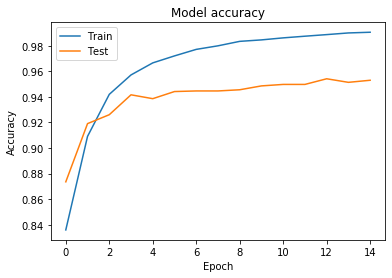

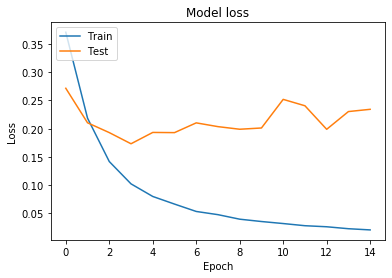

In [29]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
# predit
predit[:,0].shape 

(4302,)

In [31]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)

[[ 786   64]
 [ 138 3314]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89       924
         1.0       0.96      0.98      0.97      3378

    accuracy                           0.95      4302
   macro avg       0.94      0.92      0.93      4302
weighted avg       0.95      0.95      0.95      4302



C:\Github\DDI-Project\Predicting and understanding comprehensive drug-drug\confusion_matrix_pretty_print.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Github\DDI-Project\Predicting and understanding comprehensive drug-drug\confusion_matrix_pretty_print.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
C:\Github\DDI-Project\Predicting and understanding comprehensive drug-drug\confusion_matrix_pretty_print.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Github\DDI-Project\Predicting and understanding comprehensive drug-drug\confusion_matrix_pretty_print.py:169: MatplotlibDeprecationWarning:

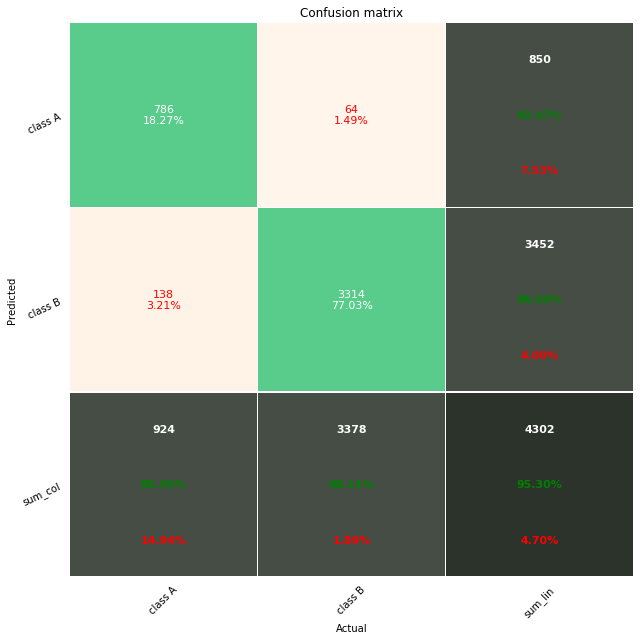

In [32]:

cm = metrics.confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)/2))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)/2),list(predicts))
print(CR)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)/2), list(predicts))
